In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

pd.set_option("display.max_columns", None)

# Which varible(s) is(are) the best predictor(s) of a car's fuel economy? 

 ### Your employer, a used car dealership, wants to increase inventory of cars with superior fuel economy and decrease purchases of cars with bad fuel economy. As a result, the stakeholder has requested a model that can predict the fuel economy of a car when that information is missing from the vehicle details.

### Additionally, the stakeholders have requested a dashboard that can display information that may be useful in making future purchases. 
* Which variable(s) are the best predictors of City MPG?
* Which variable(s) are the best predictors of Highway MPG?

In [54]:
cwd = os.getcwd()
data_import = pd.read_csv(cwd + "\Car_Price_Pred.csv")
data_import.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
raw_data = data_import.copy()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [56]:
data.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

#### Numerical Variable Statistics

In [57]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Analyze **Target** Variables : **City MPG** & **Highway MPG**

In [58]:

# Create a copy of the data for analysis
data = raw_data.copy()

# Visualize the City MPG distribution with Boxplot and Histogram
fig1 =  px.box(data, x="citympg")
fig2 = px.histogram(data, x="citympg")
fig1.show()
fig2.show()

# Descriptive Statistics for City MPG
citympg_stats = pd.DataFrame(data["citympg"].describe())


# Print a title with Descriptive Statistics Table
print("---------------")
print("City MPG Stats")
print("---------------")
display(citympg_stats)


---------------
City MPG Stats
---------------


,citympg
count,205.000000
mean,25.219512
std,6.542142
min,13.000000
25%,19.000000
50%,24.000000
75%,30.000000
max,49.000000


### Remove Outlilers: City MPG
* Records with City MPG > 46

In [79]:
# Subset the records with City MPG outliers
outlier_indx = data[data["citympg"] > 46].index

# Check the shape of the dataframe with outliers removed
original_shape = data.shape
modified_df = data.drop(outlier_indx, axis=0)

print(original_shape)
print(modified_df.shape)

(205, 26)
(203, 26)


### Distribution of Highway MPG

In [81]:

# Visualize the Highway MPG distribution with Boxplot and Histogram
fig1 = px.box(modified_df, x="highwaympg")
fig2 = px.histogram(modified_df, x="highwaympg")
fig1.show()
fig2.show()

# Descriptive Statistics for City MPG
highwaympg_stats = pd.DataFrame(modified_df["highwaympg"].describe())

# Print a title with Descriptive Statistics Table
print("------------------")
print("Highway MPG Stats")
print("------------------")
display(highwaympg_stats)

------------------
Highway MPG Stats
------------------


,highwaympg
count,203.000000
mean,30.527094
std,6.535736
min,16.000000
25%,25.000000
50%,30.000000
75%,34.000000
max,50.000000


### Remove Outliers: Highway MPG
* 1 Record with Highway MPG = 50 

In [82]:
# Create a copy of the modified dataframe
temp_df1 = modified_df.copy()

# Subset the records with City MPG outliers
outlier_hwy = temp_df1[temp_df1["highwaympg"] == 50].index

# Check the shape of the dataframe with outliers removed
original_shape = temp_df1.shape
temp_df2 = temp_df1.drop(outlier_hwy, axis=0)

print(original_shape)
print(temp_df2.shape)

(203, 26)
(202, 26)


#### Distribution of Numerical Variables

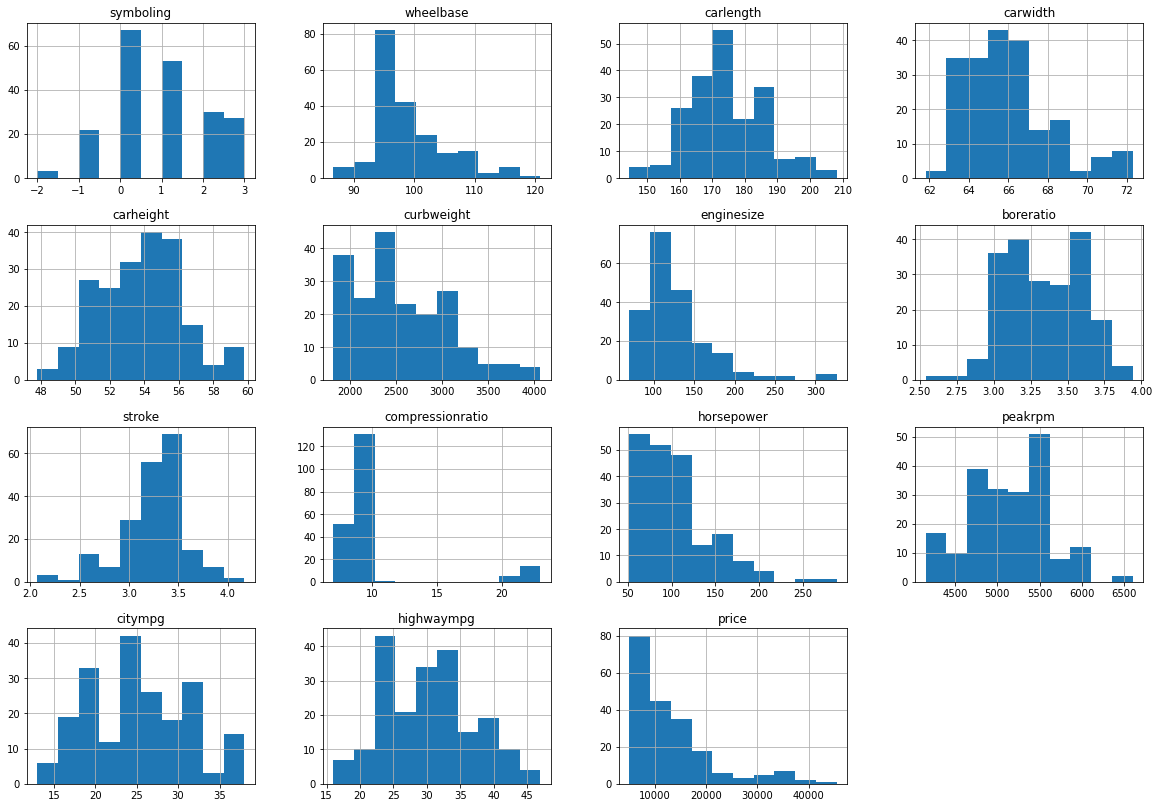

In [83]:
# Create a checkpoint copy of the dataframe
clean_data = temp_df2.copy()

#fig, ax = plt.subplots(figsize=(10,6))
hist_data = clean_data.drop("car_ID", axis=1)

ax = hist_data.hist(figsize=(20,14))
#ax = px.scatter_matrix(hist_data)
plt.show()

#### Create New Features
* Make
* Model
* "#" of doors
##### *It appears that the majority of cars within this dataset are from Japanese Manufacturers with the exception of Dodge.*

In [84]:
# Create make column using CarName variable
# Find the count of make
clean_data["Make"] = clean_data["CarName"].str.split(" ").str[0]
top_10_make = pd.Series(clean_data["Make"].value_counts().head(n=10))
top_10_make_perc = pd.Series(clean_data["Make"].value_counts(normalize=True).head(n=10))

fig = px.bar(top_10_make, title="Top 10 Vehicle Manufacturers (Make)")
fig.show()

In [85]:
# Create a model columns
clean_data["Model"] = clean_data["CarName"].str.split(" ").str[1]
clean_data["Model"].value_counts()

top_10_model = pd.Series(clean_data["Model"].value_counts().head(n=10))
top_10_model_perc = pd.Series(clean_data["Model"].value_counts(normalize=True).head(n=10))

fig = px.bar(top_10_model, title="Top 10 Vehicle Models")
fig.show()

## Separate data into two dataframes: 
####                                    1.) Body Variables + Target 
####                                    2.) Engine Variables + Target (with Price)

In [86]:
body_data_city = clean_data[["citympg", "wheelbase", "carlength", "carwidth", "carheight", "curbweight"]]
engine_data_city = clean_data[["citympg", "price", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "highwaympg", "peakrpm"]]

body_data_hwy = clean_data[["highwaympg", "wheelbase", "carlength", "carwidth", "carheight", "curbweight"]]
engine_data_hwy = clean_data[["highwaympg", "price", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "citympg", "peakrpm"]]


## Create Correlation Matricies w/Heatmaps

#### Body Data: **Curbweight** and **Carlength** have the strongest linear association with City MPG
* Carlength has a very low correlation with City MPG, so it will be excluded from the model.

,citympg,wheelbase,carlength,carwidth,carheight,curbweight
citympg,1.000000,-0.440740,-0.649284,-0.635588,-0.031052,-0.758296
wheelbase,-0.440740,1.000000,0.870548,0.791794,0.590157,0.768439
carlength,-0.649284,0.870548,1.000000,0.837686,0.493629,0.873828
carwidth,-0.635588,0.791794,0.837686,1.000000,0.279517,0.863341
carheight,-0.031052,0.590157,0.493629,0.279517,1.000000,0.292307
curbweight,-0.758296,0.768439,0.873828,0.863341,0.292307,1.000000


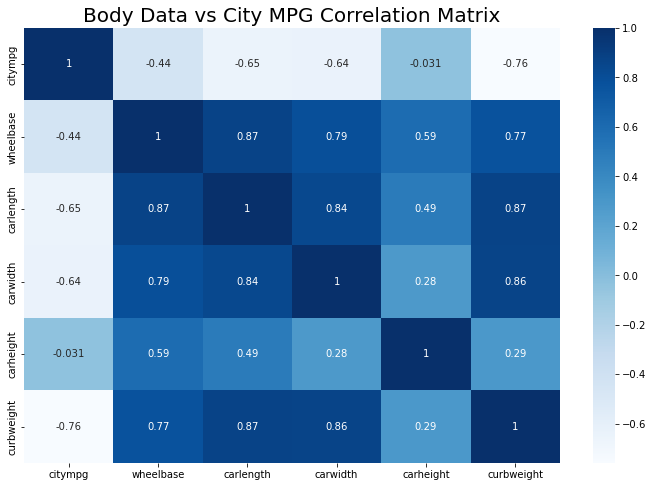

In [102]:
# Create Correlation Coefficient table
body_city_corr = body_data_city.corr()
display(body_city_corr)

# Create Heatmap with Correlation Coefficient table
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(body_city_corr, cmap="Blues", annot=True)
plt.title("Body Data vs City MPG Correlation Matrix", fontsize=20)
plt.show()

# Visualize relationship between Curbweight and Target Variable w/ Trendline
display(px.scatter(body_data_city, x="citympg", y="curbweight", trendline="ols", title="Curbweight vs City MPG"))

fig = px.box(body_data_city, x="curbweight")
fig.show()

#### Engine Data: **Highway MPG** and **Horsepower** have the strongest linear association with City MPG.

,citympg,price,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,peakrpm
citympg,1.000000,-0.707171,-0.667024,-0.569842,-0.054323,0.319422,-0.818546,0.966443,-0.098902
price,-0.707171,1.000000,0.873175,0.545832,0.081260,0.080217,0.805839,-0.714910,-0.091798
enginesize,-0.667024,0.873175,1.000000,0.575736,0.203945,0.036803,0.807154,-0.688371,-0.252697
boreratio,-0.569842,0.545832,0.575736,1.000000,-0.054400,0.022249,0.561777,-0.570837,-0.269823
stroke,-0.054323,0.081260,0.203945,-0.054400,1.000000,0.180397,0.084254,-0.054517,-0.064544
compressionratio,0.319422,0.080217,0.036803,0.022249,0.180397,1.000000,-0.194567,0.253417,-0.436815
horsepower,-0.818546,0.805839,0.807154,0.561777,0.084254,-0.194567,1.000000,-0.779506,0.124342
highwaympg,0.966443,-0.714910,-0.688371,-0.570837,-0.054517,0.253417,-0.779506,1.000000,-0.035279
peakrpm,-0.098902,-0.091798,-0.252697,-0.269823,-0.064544,-0.436815,0.124342,-0.035279,1.000000


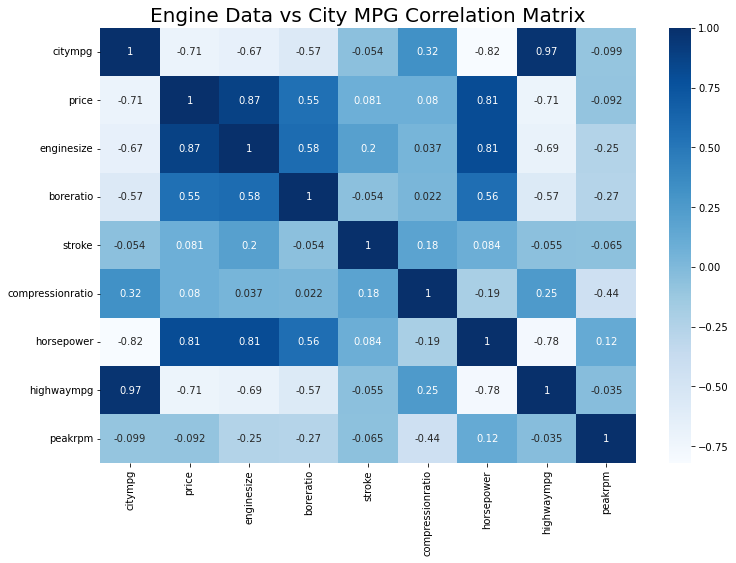

In [91]:
engine_city_corr = engine_data_city.corr()
display(engine_city_corr)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(engine_city_corr, cmap="Blues", annot=True)
plt.title("Engine Data vs City MPG Correlation Matrix", fontsize=20)
plt.show()

display(px.scatter(engine_data_city, x="citympg", y="price", trendline="ols", title="Price vs City MPG"))

display(px.scatter(engine_data_city, x="citympg", y="compressionratio", trendline="ols", title="Compression Ratio vs City MPG"))

## Highway & Compression Ratio
## Horsepower & Compression ratio
## Price & Compression Ratio

### Handle Outliers in Price & Compression Ratio

In [92]:
fig1 = px.box(engine_data_city, x="price")
fig1.show()

fig2 = px.box(engine_data_city, x="compressionratio")
fig2.show()

In [97]:
outlier_df = engine_data_city.copy()

temp_outlier = outlier_df[outlier_df["price"] > 28000].index

modified_data1 = outlier_df.drop(temp_outlier, axis=0)

fig1 = px.box(modified_data1, x="price")
fig1.show()

fig2 = px.scatter(modified_data1, x="price", y="citympg", trendline="ols")
fig2.show()

In [101]:
outlier_df = engine_data_city.copy()

temp_outlier = outlier_df[(outlier_df["compressionratio"] > 11) | (outlier_df["compressionratio"] <= 7)].index

modified_data2 = outlier_df.drop(temp_outlier, axis=0)

fig1 = px.box(modified_data2, x="compressionratio")
fig1.show()

fig2 = px.scatter(modified_data2, x="compressionratio", y="citympg", trendline="ols")
fig2.show()

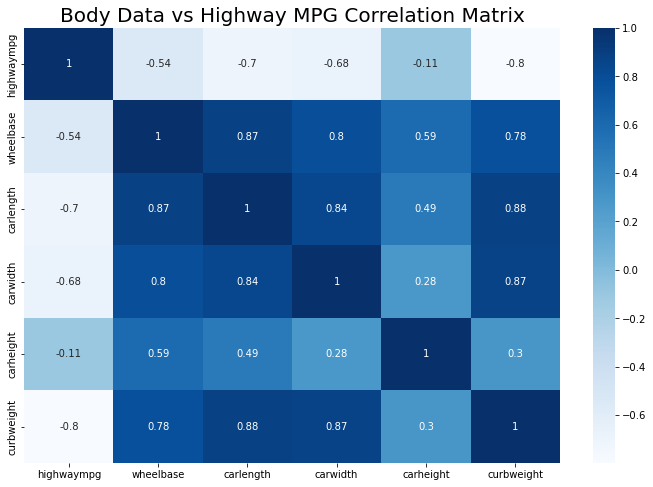

In [ ]:
body_hwy_corr = body_data_hwy.corr()
body_hwy_corr

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Body Data vs Highway MPG Correlation Matrix", fontsize=20)
sns.heatmap(body_hwy_corr, cmap="Blues", annot=True)
plt.show()

#### Visualizing Distributions
* Now that we have chosen our features, we can explore the distributions and look for outliers with Box Plots
* First We will examine our <u>target variable</u>: **City MPG**

In [ ]:
model_data = data[["citympg", "curbweight", "compressionratio"]]

# Plot the distribution of City MPG
# Distribution with Historam & Boxplot:
px_fig = px.histogram(model_data, x="citympg", width=900, height=400, title="Distribution of City MPG")
px_fig.show()

px_fig2 = px.box(model_data, x="citympg", width=900, height=400, title="Distribution of City MPG")
px_fig2.show()


### Visualize the Distribution of the Independent Variables
* Curb Weight
* Compression Ratio

In [ ]:
# Plot the distribution of Curb Weight and Compression Ratio
# Distribution with Historam & Boxplot:
px_fig = px.histogram(model_data, x="curbweight", width=900, height=400, title="Distribution of Curb Weight")
px_fig.show()

px_fig2 = px.box(model_data, x="curbweight", width=900, height=400, title="Distribution of Curb Weight")
px_fig2.show()


px_fig3 = px.histogram(model_data, x="compressionratio", width=900, height=400, title="Distribution of Compression Ratio")
px_fig3.show()

px_fig4 = px.box(model_data, x="compressionratio", width=900, height=400, title="Distribution of Compression Ratio")
px_fig4.show()

### Lets Examine the records with **Outliers** 

In [ ]:
outlier = model_data.loc[model_data["citympg"] > 45, :]
outlier

,citympg,curbweight,compressionratio
18,47,1488,9.5
30,49,1713,9.6


In [ ]:
outlier_1 = model_data.loc[model_data["compressionratio"] > 12, :]
outlier_1.shape

(20, 3)

#### **22** Records contain outliers. Let's exclude these records from the analysis.

In [ ]:
outlier_df = pd.concat([outlier, outlier_1])
#outlier_df.shape


model_data1 = model_data.drop(outlier_df.index)
model_data1

,citympg,curbweight,compressionratio
0,21,2548,9.0
1,21,2548,9.0
2,19,2823,9.0
3,24,2337,10.0
4,18,2824,8.0
...,...,...,...
199,17,3157,7.5
200,23,2952,9.5
201,19,3049,8.7
202,18,3012,8.8


#### Correlation Matix & Scatterplots Post-Feature Selection

,citympg,curbweight,compressionratio
citympg,1.000000,-0.859084,0.397846
curbweight,-0.859084,1.000000,-0.299583
compressionratio,0.397846,-0.299583,1.000000


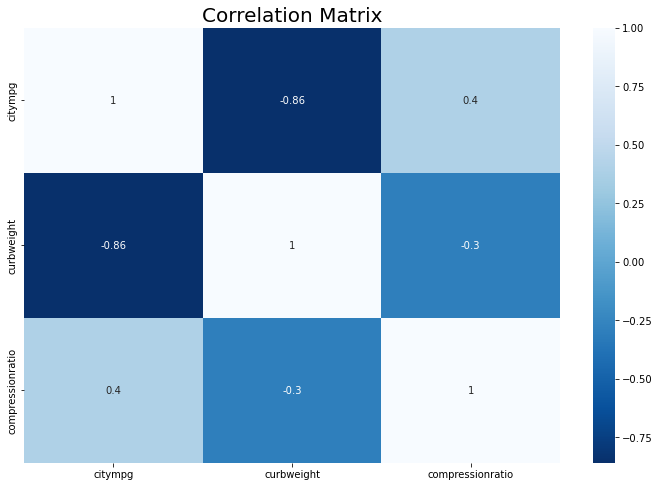

In [ ]:

model_corr = model_data1.corr()

display(model_corr)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(model_corr, cmap="Blues_r", annot=True)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

display(px.scatter(model_data1, x="compressionratio", y="curbweight", trendline="ols", title="Compression Ratio vs Curbweight"))

display(px.scatter(model_data1, x="citympg", y="curbweight", trendline="ols", title="Curb Weight vs City MPG"))

display(px.scatter(model_data1, x="citympg", y="curbweight", trendline="ols", title="Compression Ratio vs City MPG"))

### Linear Regression: Predict City MPG 
#### Independent Variables:
* curbweight
* compressionration
#### Dependent Variable:
* citympg

In [ ]:
X = model_data1[["curbweight", "compressionratio"]]
y = model_data1["citympg"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(146, 2)
(146,)
(37, 2)
(37,)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)
y_pred

array([31.14749401, 31.47801554, 23.16070617, 22.81285242, 27.92260583,
       16.62043947, 30.13548777, 30.8059743 , 24.78976271, 19.11662557,
       18.76243778, 20.68651645, 30.56044402, 21.54742714,  8.85396092,
       15.20391863, 30.03794361, 27.28989319, 30.8059743 , 25.30987346,
       19.09451402, 29.04637903, 28.36644903, 32.46874518, 17.00929171,
       28.00054327, 25.13367209, 31.47801554, 27.19856791, 23.02060881,
       18.25583005, 26.39587277, 23.34013214, 28.19646653, 12.04035544,
       31.48434958, 20.39532353])

### The Linear Regression model using curbweight and compression ratio is accurate in predicting the City MPG <u>**89%**</u> of the time.
#### **City MPG = -0.009(Curb Weight) + 1.283(Compression Ratio) + 36.862** 
#### Mean Absolute Percent Squared Error : **11.2%**

In [ ]:
mse = round(mean_squared_error(y_test, y_pred), 3)
r2 = round(r2_score(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 3)
cod = round(lin_reg.score(X_test, y_test), 3)

print(f"Coeficient of Determination: {cod}")
print(f"Mean Squared Error:{mse}" )
print(f"R2 Score: {r2}" )
print(f"Mean Absolute Error: {mae}" )
print(f"Mean Absolute Percent Error: {mape}" )




Coeficient of Determination: 0.744
Mean Squared Error:13.625
R2 Score: 0.744
Mean Absolute Error: 2.522
Mean Absolute Percent Error: 0.112


In [ ]:
lin_coefs = lin_reg.coef_
lin_y_int = lin_reg.intercept_
print(list(lin_coefs))
print(lin_y_int)


[-0.0094434722232266, 1.2826423374314675]
36.861716047549585


In [ ]:
(1/3) * 220

73.33333333333333